Import packages

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
mpl.rcParams['font.size'] = 12 #font size

Import data

In [2]:
df = pd.read_csv('../Data/Chapter_1_cleaned_data.csv')

Portions needed from earlier in the Chapter

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn import metrics

In [6]:
example_lr = LogisticRegression(C=0.1, class_weight=None,
                                dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100,
                                multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None,
                                solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)

# Activity 2: Performing Logistic Regression with a New Feature and Creating a Precision-Recall Curve

In [7]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    df['LIMIT_BAL'].values.reshape(-1,1),
    df['default payment next month'].values,
    test_size=0.2, random_state=24)

In [8]:
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

In [9]:
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [10]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

0.6201990844642832

In [11]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(
    y_test_2, y_test_2_pred_proba[:,1])

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

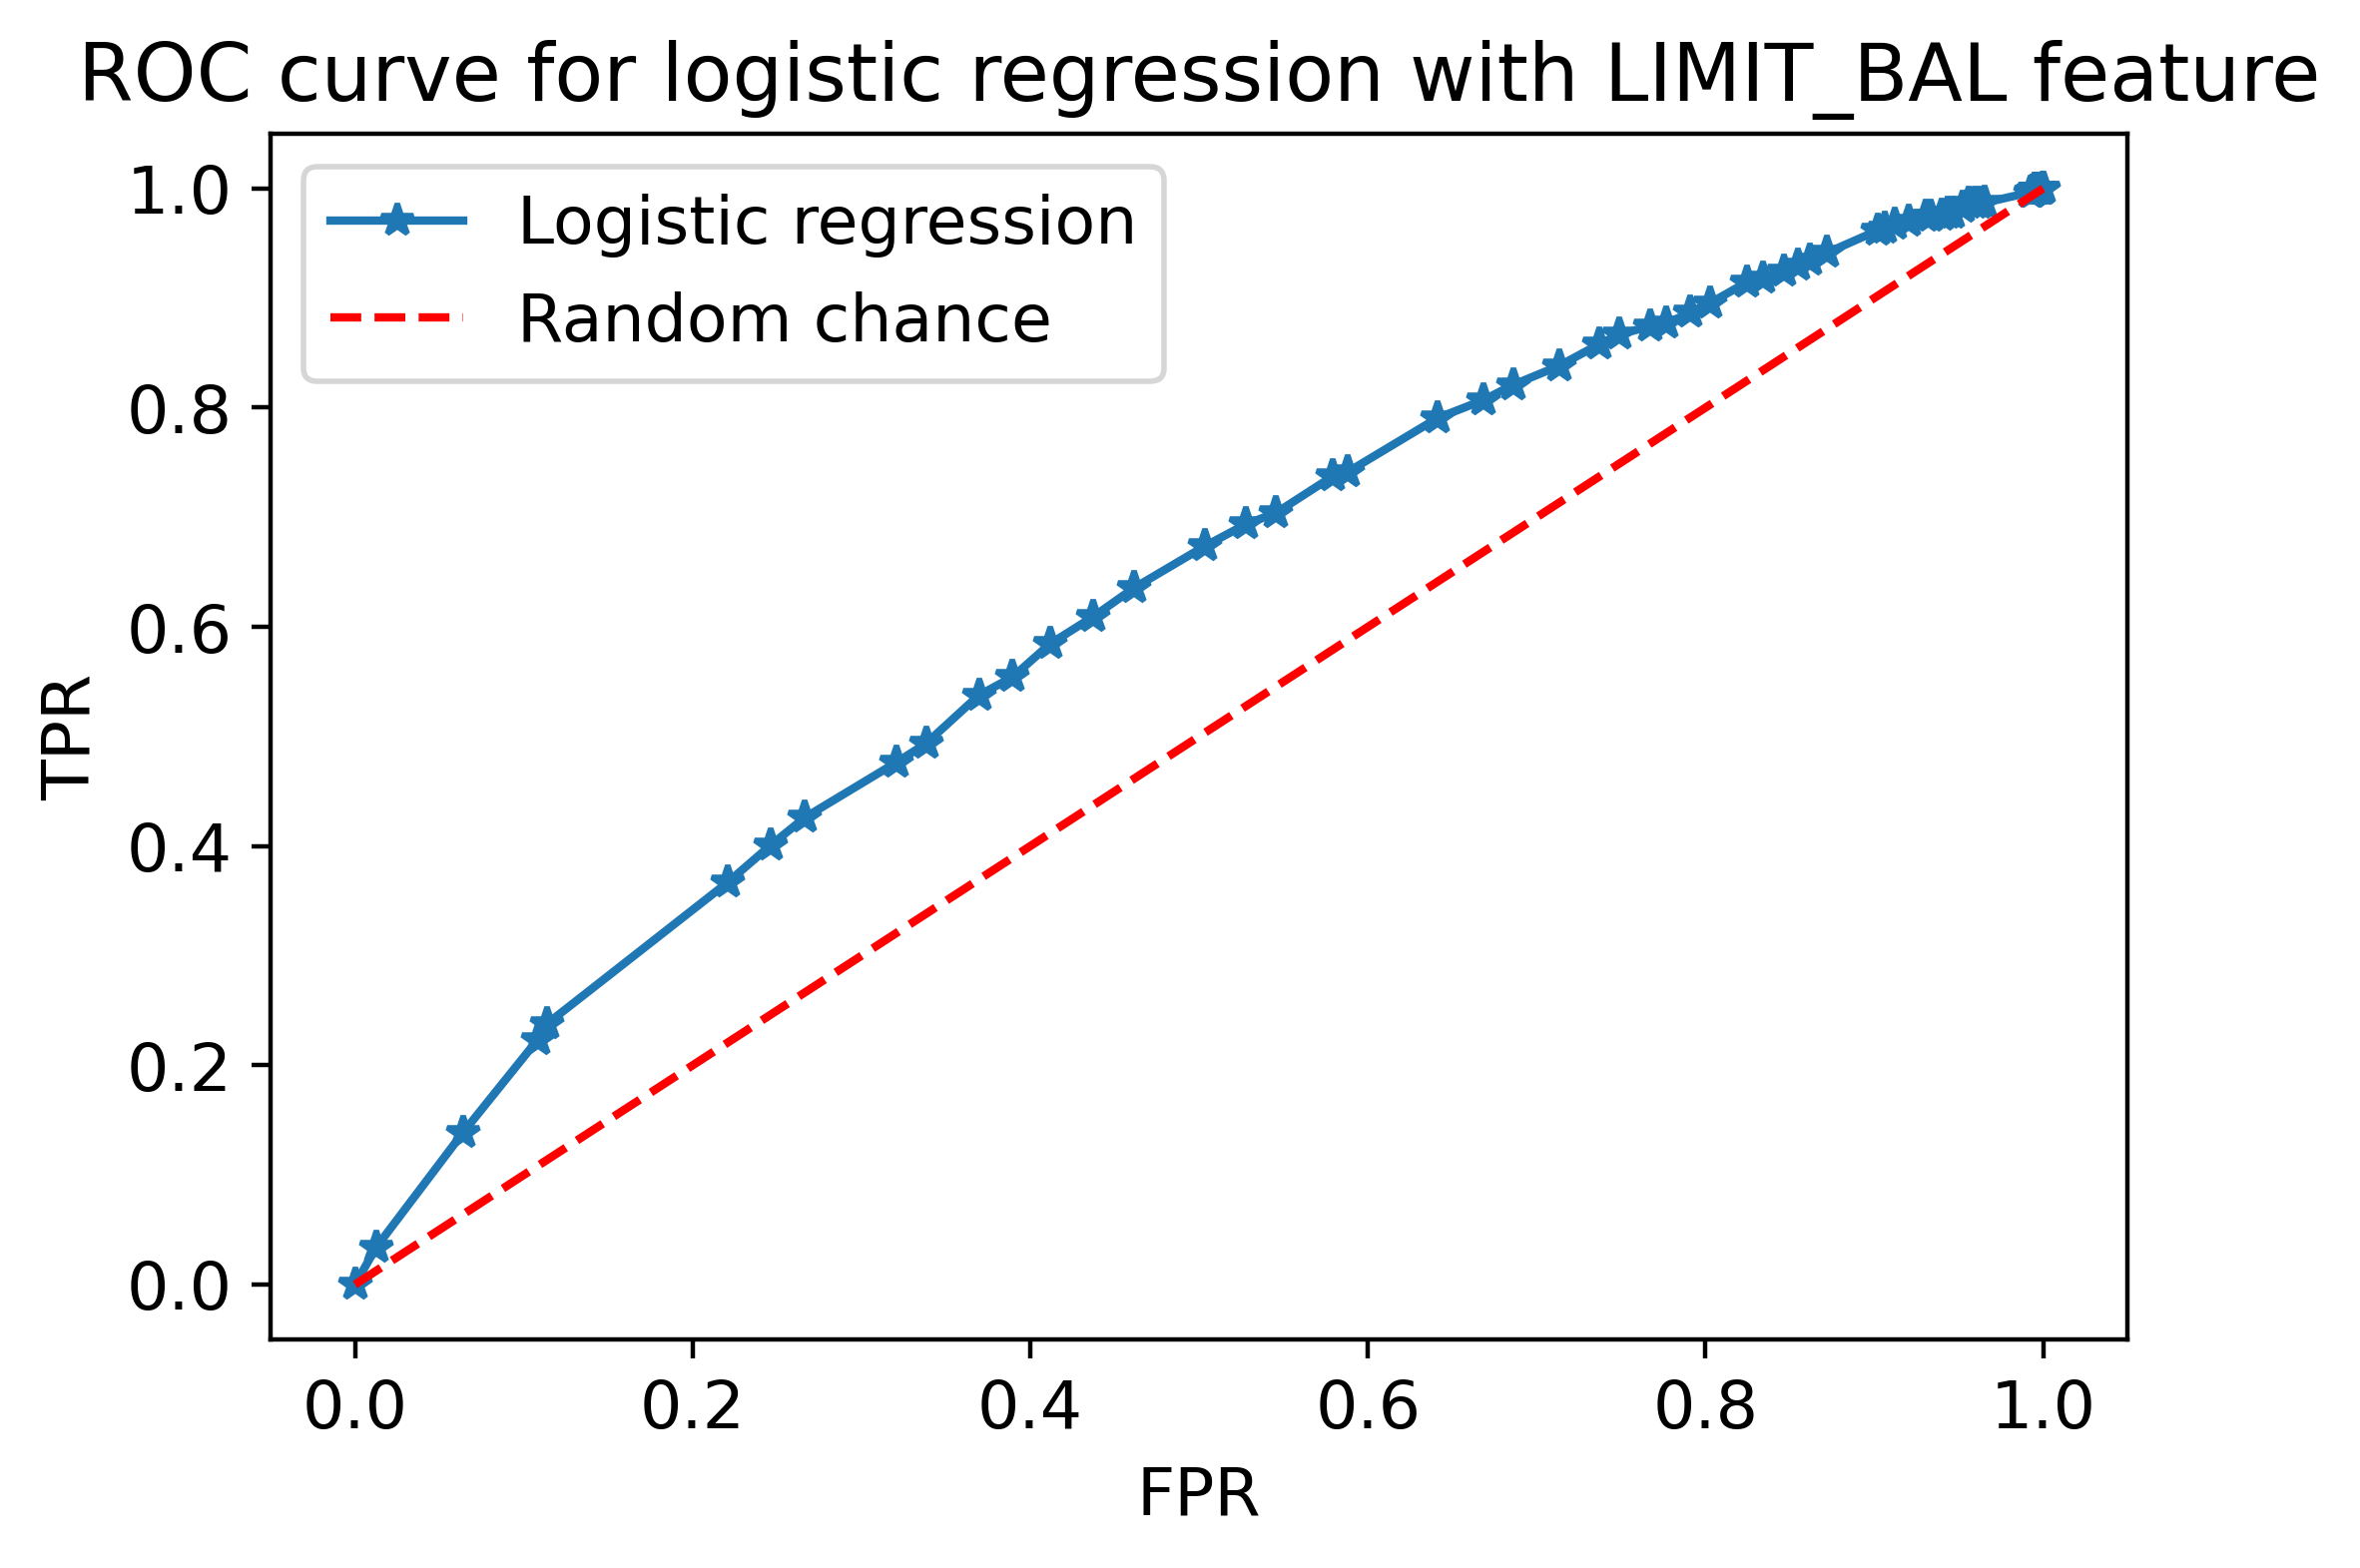

In [12]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [13]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

(0.0, 1.0)

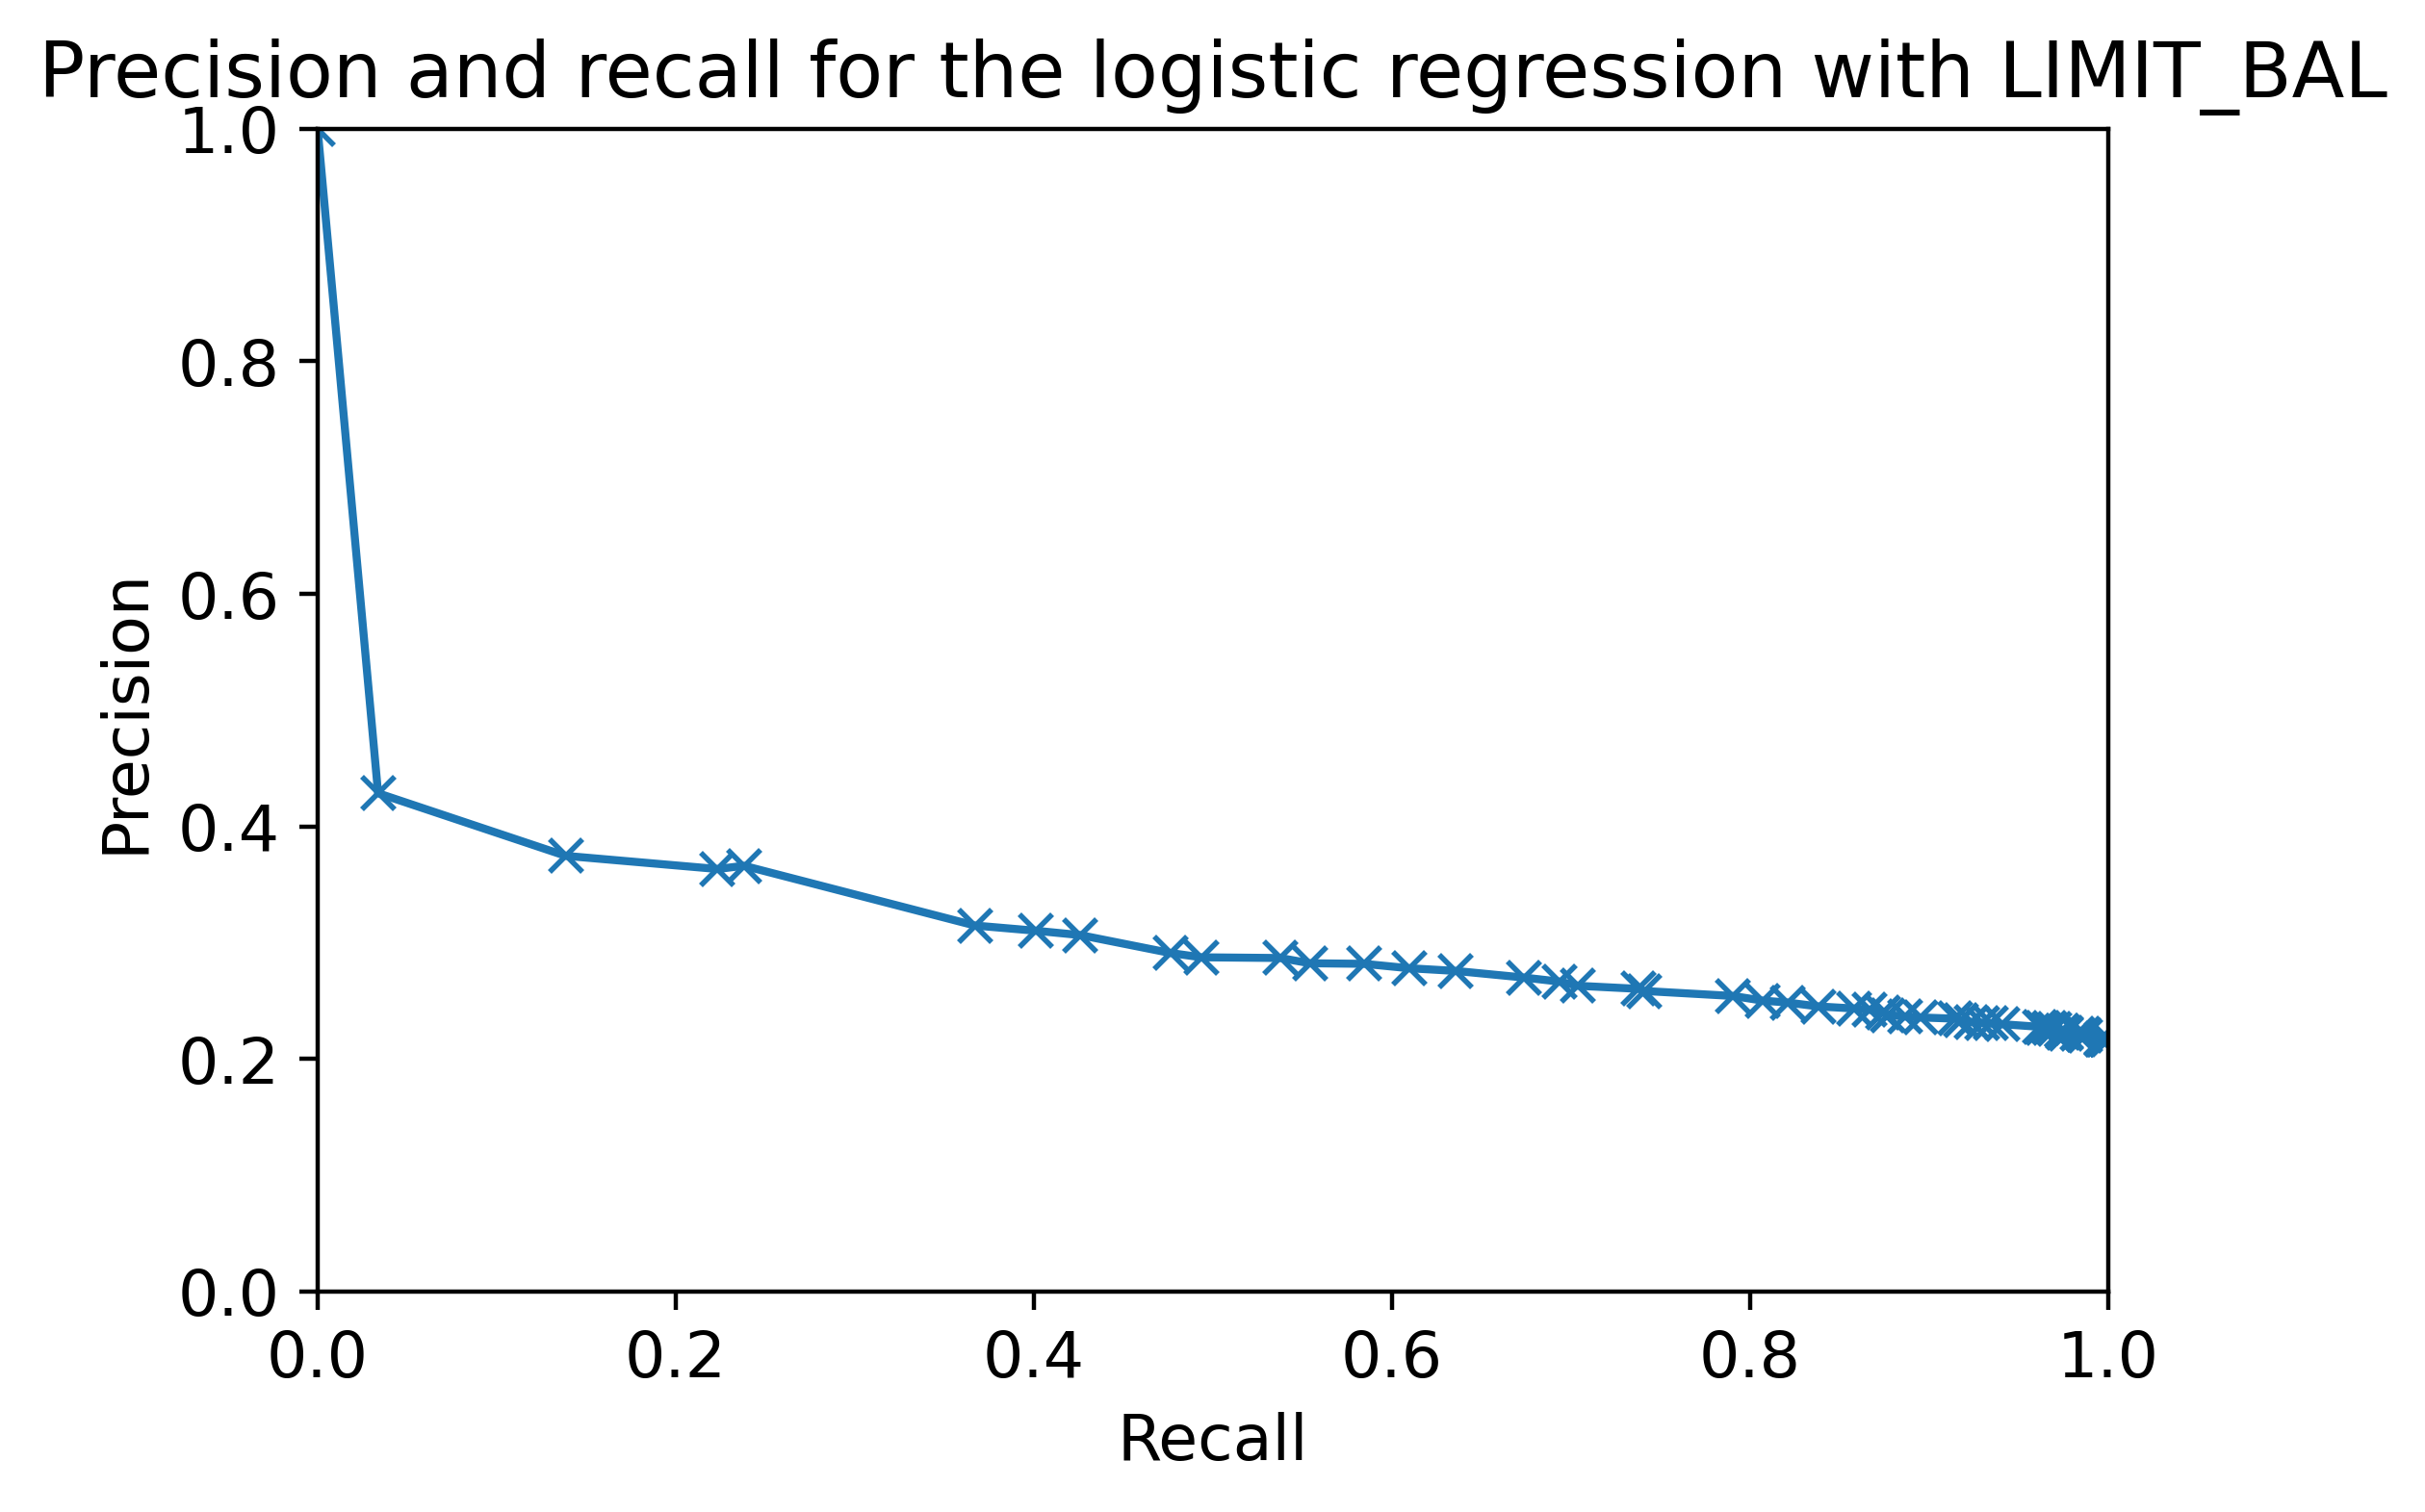

In [14]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [15]:
metrics.auc(recall, precision)

0.31566964427378624

In [16]:
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)

In [17]:
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

0.6182918113358344